In [1]:
# set up
from plotnine import *
from plotnine.data import *
import pandas as pd


In [2]:
mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


# Flexible Title with f-string

Sometimes in exploratory data analysis, we would like to try filtering a dataframe in multiple ways. Use f-string, the titles of the EDA visuals can be adjusted automatically following the filter selected. 

## Set up filter

In [3]:
mtcars['gear'].value_counts()
# filter the gears and reflect the filter in the graph
is_4_gears = mtcars['gear'] == 4 
df = mtcars[is_4_gears]
# change filter defination as needed, or return an empty string when the dataframe is not filtered
gears_filter = "among vehicles with 4 gears" 

## Example of f-string in graph title

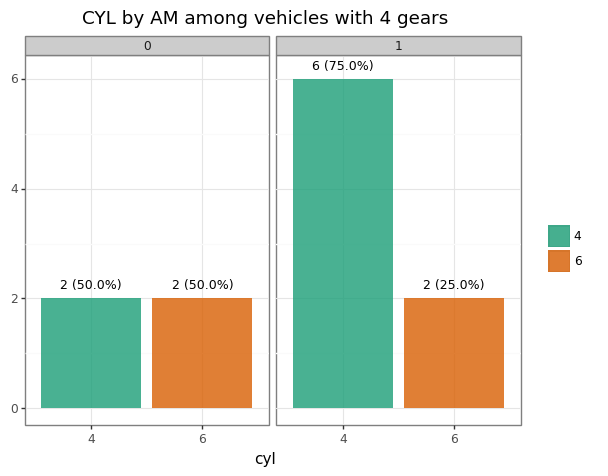

<ggplot: (138174605015)>

In [4]:
def combine(counts, percentages):
    fmt = '{} ({:.1f}%)'.format
    return [fmt(c, p) for c, p in zip(counts, percentages)]

(
    ggplot(df, aes('factor(cyl)', fill='factor(cyl)'))
    + geom_bar(alpha = 0.8)
    + geom_text(
        aes(label=after_stat('combine(count, prop*100)'), group=1),
        stat='count',
        nudge_y=0.125,
        va='bottom',
        size=9
    )
    + facet_wrap('am') 
    + scale_fill_brewer(
        type = 'qual',
        palette = 'Dark2'
    )
    + labs(
        x = 'cyl',
        y = "",
        fill = "",
        title = f'CYL by AM {gears_filter}'
    )
    + theme_bw()
)